# Capstone: Visualizations

**San Francisco Police Department Incident Reports**

This notebook supports the visualizations for the final report of this Capstone Project. Please reference 
the [README.md](https://github.com/fazeelgm/UCB_ML_AI_Capstone/blob/main/README.md) 
for details.

## Imports & Utilities

### Imports

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg


# Import utilities
# import pathlib
import time

# Export dataFrame's as images
import dataframe_image as dfi

# import project utils
import sys
sys.path.append('../src')

import data_utils
from data_utils import Config

import graph_utils

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
# Configure logging
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# logging.getLogger().setLevel(logging.DEBUG)
# logging.getLogger().setLevel(logging.INFO)

### Utility Functions

In [8]:
def time_secs_to_msg(lapse_time_secs, mins_label='m', secs_label='s'):
    if lapse_time_secs <= 60:
        return f'{lapse_time_secs%60:.2f}{secs_label}'
    else:
        return f'{lapse_time_secs//60:,.0f}{mins_label} {lapse_time_secs%60:.2f}{secs_label}'

## The Data

Details for the data can be found in the project [README.md](https://github.com/fazeelgm/UCB_ML_AI_Capstone/blob/main/README.md).

### Read the Data

In [11]:
# Which dataset to work from? Select sample size percentage

# sample_file = data_utils.select_sample_csv_file(pct=10)
sample_file = data_utils.select_sample_csv_file(pct=100)
# sample_file = data_utils.select_sample_csv_file(pct=75)
# sample_file = data_utils.select_sample_csv_file(pct=50)
# sample_file = data_utils.select_sample_csv_file(pct=25)

print(f'Selected sample file: {sample_file}')

Selected sample file: ../data/incidents_clean.csv


In [12]:
current_raw_df, current_clean_df = data_utils.get_clean_data_from_csv(sample_file)

Reading file: ../data/incidents_clean.csv ... Done: 894,585 rows, 36 columns
... Converting datetime to timeseries ... Done
... Setting index to datetime ... Done
Done


### Apply Feature Engineering Learnings

We will re-use the learnings from the Exploratory Data Analysis (EDA) and apply it to clean the data using two shared methods:

* `data_utils.preprocess_data()`
* `data_utils.fix_data_artifacts()`
* `data_utils.apply_synthetic_features()`

Please refer to the EDA notebook, 
[ExploratoryDataAnalysis.ipynb](https://github.com/fazeelgm/UCB_ML_AI_Capstone/blob/main/notebooks/ExploratoryDataAnalysis.ipynb), for details.

In [15]:
data = data_utils.preprocess_data(current_raw_df.copy())

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column Unnamed: 0 not dropped: KeyError("['Unnamed: 0'] not found in axis")
... preprocess_drop_cols: Column esncag_-_boundary_file dropped
... preprocess_drop_cols: Column central_market/tenderloin_boundary_polygon_-_updated dropped
... preprocess_drop_cols: Column civic_center_harm_reduction_project_boundary dropped
... preprocess_drop_cols: Column hsoc_zones_as_of_2018-06-05 dropped
... preprocess_drop_cols: Column invest_in_neighborhoods_(iin)_areas dropped
... preprocess_drop_cols: Column report_type_code dropped
... preprocess_drop_cols: Column report_type_description dropped
... preprocess_drop_cols: Column filed_online dropped
... preprocess_drop_cols: Column intersection dropped
... preprocess_drop_cols: Column cnn dropped
... preprocess_drop_cols: Column point dropped
... preprocess_drop_cols: Column supervisor_district dropped
... preprocess_drop_cols: Column supervisor_district_2012 dropped
...

In [16]:
# Fix data value artifacts that were discovered during EDA
data = data_utils.fix_data_artifacts(data)

Fixing data artifacts (in-place) ... 
... Category column:
    ..."Human Trafficking*"
    ..."Motor Vehicle Theft"
    ..."Weapons Offence"
Done


Create the new, synthetic features that were introduced during EDA:

In [18]:
data = data_utils.apply_synthetic_features(data)

Generating synthetic feature columns (in-place) ... 
... Adding columns ['hour', 'minute', 'day', 'month']'
... Adding column ['weekend']
... Adding column ['season']
... Adding column ['holiday']
... Adding column ['tod']
Done


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829328 entries, 2023-03-11 14:00:00 to 2023-03-21 17:42:00
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             829328 non-null  object 
 1   time             829328 non-null  object 
 2   year             829328 non-null  int64  
 3   dow              829328 non-null  object 
 4   category         829328 non-null  object 
 5   resolution       829328 non-null  object 
 6   police_district  829328 non-null  object 
 7   neighborhood     829328 non-null  object 
 8   latitude         829328 non-null  float64
 9   longitude        829328 non-null  float64
 10  hour             829328 non-null  int64  
 11  minute           829328 non-null  int64  
 12  day              829328 non-null  int64  
 13  month            829328 non-null  int64  
 14  weekend          829328 non-null  int64  
 15  season           829328 non-null  object 
 16  holi

In [20]:
data.head(2)

date   time  year       dow       category  \
datetime                                                                
2023-03-11 14:00:00  2023/03/11  14:00  2023  Saturday        Assault   
2022-06-27 12:00:00  2022/06/27  12:00  2022    Monday  Lost Property   

                         resolution police_district  \
datetime                                              
2023-03-11 14:00:00  Open or Active            Park   
2022-06-27 12:00:00  Open or Active         Central   

                                       neighborhood   latitude   longitude  \
datetime                                                                     
2023-03-11 14:00:00                Golden Gate Park  37.772895 -122.454285   
2022-06-27 12:00:00  Financial District/South Beach  37.787359 -122.408227   

                     hour  minute  day  month  weekend  season  holiday  \
datetime                                                                  
2023-03-11 14:00:00    14       0   11      3        1  Spring    False   
2022-06-27 12:00:00    12       0   27      6        0  Summer    False   

                           tod  
datetime                        
2023-03-11 14:00:00  Afternoon  
2022-06-27 12:00:00  Afternoon

In [21]:
# data.to_csv('../data/incidents_10.csv')

## SF Crime Location-based Maps

### Geo-Data Attributions

According to [LatLong.net](https://www.latlong.net/place/san-francisco-bay-area-ca-usa-32614.html) the San Francisco County is bounded by the following rectangle:

* Latitude Range:
  * Northern limit: 37.8330° N
  * Southern limit: 37.7031° N
* Longitude Range:
  * Western limit: -122.52279° W
  * Eastern limit: -122.3515° W

I used [OpenStreetMaps to generate the background image](https://www.openstreetmap.org/export#map=13/37.76719/-122.41190) for the visuals in this project.

## SF Incidents Map

### SF Crime Locations Map

In [26]:
categories = data.category.value_counts()
cat_names = categories.index

In [27]:
map_img = mpimg.imread(Config.DATA_DIR / 'sf-map3-bw.png')
asp = map_img.shape[0] * 1.0 / map_img.shape[1]

# Set the boundaries for the map
longitude_min, longitude_max = -122.52279, -122.3515
latitude_min, latitude_max = 37.7031, 37.8330

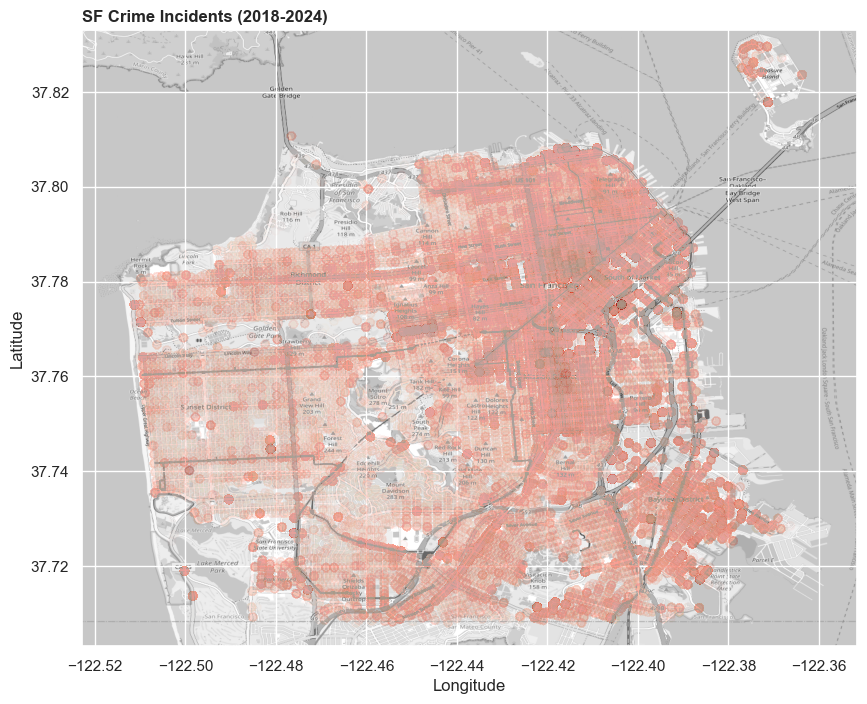

In [28]:
# Assign a color index to each crime category
cr_hist = dict(zip(cat_names, range(len(categories))))

# Draw a scatter plot to show the crimes distribution
fig = plt.figure(figsize=(10,8))

# cmap=plt.cm.gist_ncar
cmap=plt.cm.Reds
# cmap=plt.cm.copper
# cmap=plt.cm.cividis

plt.imshow(map_img, extent=[longitude_min, longitude_max, latitude_min, latitude_max], aspect='auto')
# plt.imshow(map_img, extent=[longitude_min, longitude_max, latitude_min, latitude_max], aspect=1/asp)

plt.scatter(data.longitude, data.latitude, 
            c=data.category.map(cr_hist), cmap=cmap, alpha = 0.01)
plt.title("SF Crime Incidents (2018-2024)", loc="left", fontdict={"weight": "bold"}, y=1.0)#, fontsize=40)
plt.xlabel('Longitude')#, fontsize=30)
plt.ylabel('Latitude')#, fontsize=30)

fig.savefig(Config.IMAGE_DIR / 'sf_crime_locations_map.png', bbox_inches='tight')
plt.show()

### SF Crime Categories By Location

In [30]:
def plot_long_lat_map(df, categories):
    """
    Scatterplot of the crimes in the DF by location on the city map

    :param df: Data to plot
    :param categories: 
    """
    
    fig = plt.figure(figsize=(50, 100))
    
    for i in range(len(categories)):
        p = plt.subplot(9, 5, i+1)
        cur_crime_data = df[df.category == categories[i]]
        p.imshow(map_img, extent=[longitude_min, longitude_max, latitude_min, latitude_max], aspect='auto')
        p.scatter(cur_crime_data.longitude, cur_crime_data.latitude, c='red', alpha = 0.05)
        plt.xlabel("Longitude")#, fontsize=25)
        plt.ylabel('Latitude')#, fontsize=25)
        # p.set_xticklabels(rotation=30)
        plt.title(f'Crime: {categories[i]}', fontsize=30)
    
    plt.suptitle('Top Crime Categories by Location')
    
    plt.tight_layout()
    fig.savefig(Config.IMAGE_DIR / 'sf_top_categorie_by_location_map.png', bbox_inches='tight')
    plt.show()

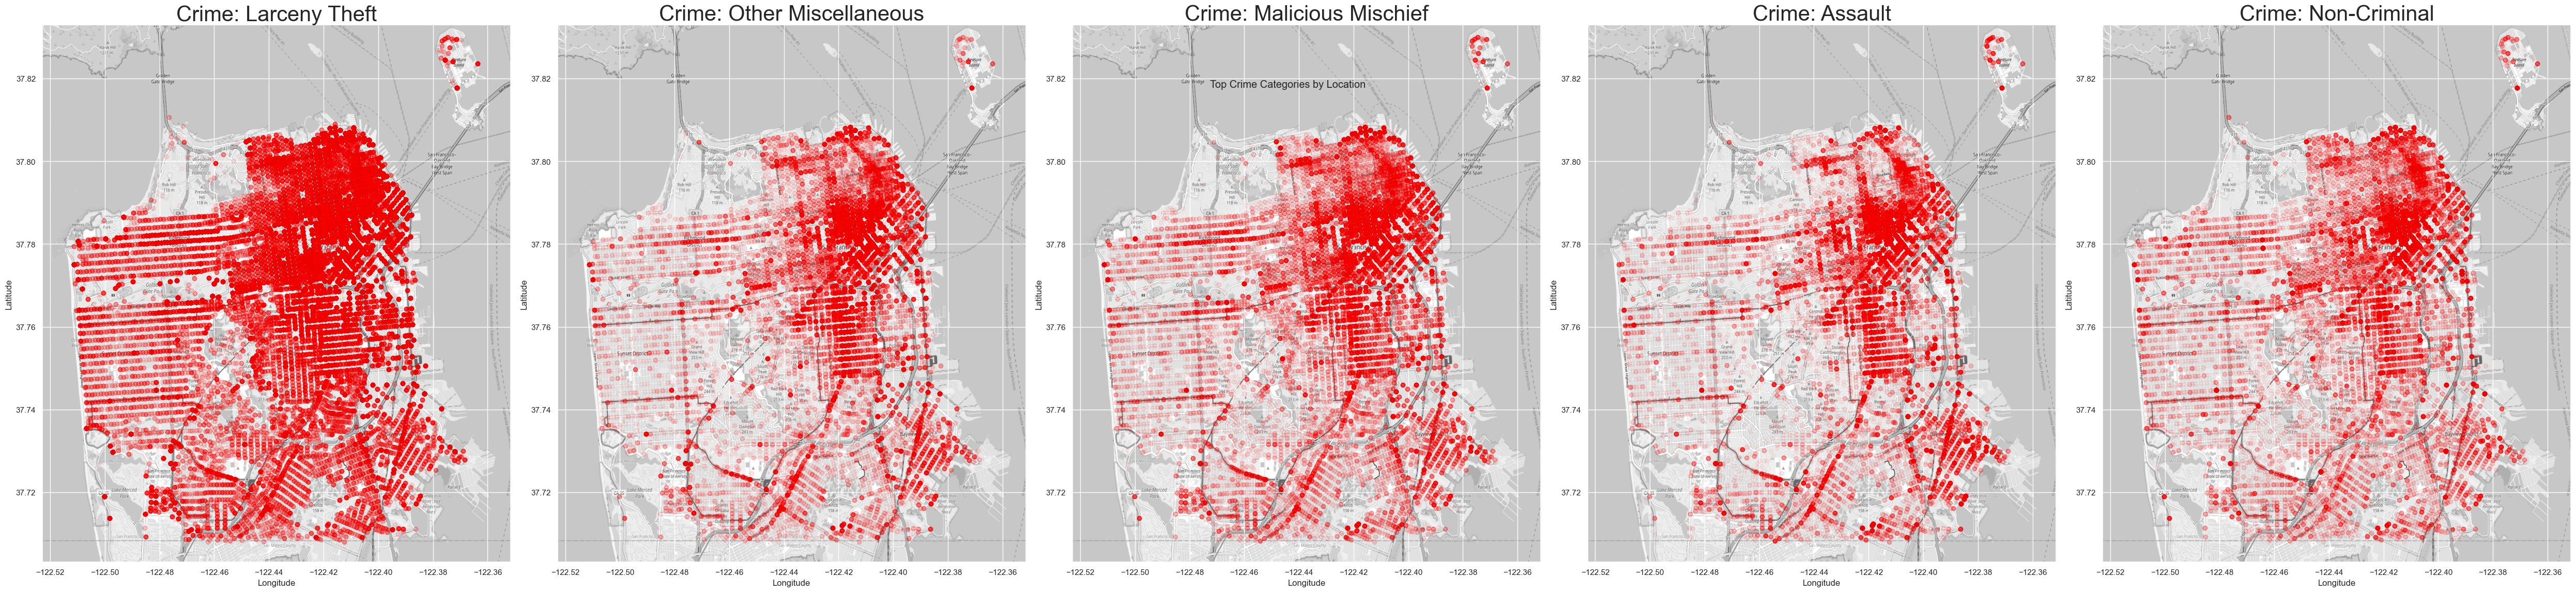

In [31]:
# sns.set(font_scale=1.2)
plot_long_lat_map(data, cat_names[0:5])

### Crimes By Police District Map

In [33]:
import geopandas as gpd
import contextily as ctx
import geoplot as gplt

In [34]:
# Grab the Police District locations from https://data.sfgov.org/-/Current-Police-Districts/wkhw-cjsf
districts = gpd.read_file('../data/Current_Police_Districts_20241008.csv')

# Normalize the district names to match our data
districts['district'] = districts['district'].str.capitalize()
# districts

In [35]:
# Load PDs into geopanda
districts.rename(columns={'the_geom': 'geometry'}, inplace=True)
districts = gpd.GeoDataFrame(districts, geometry=gpd.GeoSeries.from_wkt(districts['geometry']))

# Set the coordinate reference system (CRS) to longitude/latitude
districts = districts.set_crs(epsg=4326)

In [36]:
# Add Incident counts to geopanda
pd_by_incidents = data.groupby('police_district').count().iloc[:, [0]].rename(columns={'date': 'incidents'})
districts = districts.merge(pd_by_incidents, how='inner', 
                            left_on='district', right_on='police_disrict', right_index=True)

# Calculate the incidents per day for every district
days = data.groupby('date').count().shape[0]
districts['inc_per_day'] = districts.incidents / days

# districts

Now we will plot the map and the incidents/day histogram.

NOTE: Sample code from https://geopandas.org/en/v0.4.0/gallery/plotting_basemap_background.html

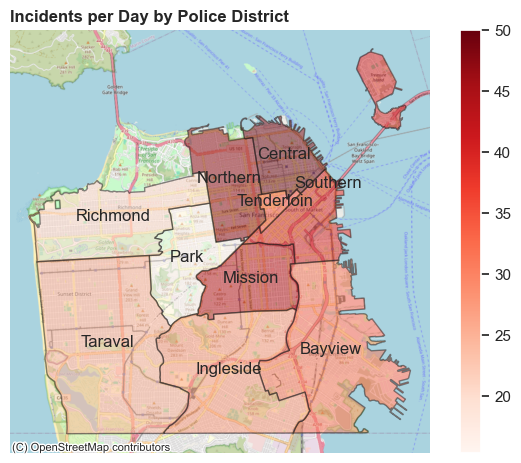

In [38]:
# Sample code from https://geopandas.org/en/v0.4.0/gallery/plotting_basemap_background.html

# Prep for tiling the background image
districts = districts.to_crs(epsg=3857)

# Plot the map and histogram of incidents per day
ax = districts.plot(column='inc_per_day', cmap='Reds', alpha=0.5, edgecolor='k', legend=True)

# Add the city map as background
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add PD names
for i in districts.index:
    plt.annotate(districts.loc[i].district, 
                 (districts.loc[i].geometry.centroid.x, districts.loc[i].geometry.centroid.y),
                 horizontalalignment='center')

ax.set_axis_off()

plt.title('Incidents per Day by Police District', loc="left", fontdict={"weight": "bold"}, y=1.0)

plt.tight_layout()
plt.savefig(Config.IMAGE_DIR / 'sf_incidents_by_PD_map.png', bbox_inches='tight')

plt.show()

## Trends & Scenarios

Let's save some Top Feature distributions that we would like to use later in our queries:

In [41]:
top_cats = data.category.value_counts()
top_pds = data.police_district.value_counts()

### Top Categories by Police District

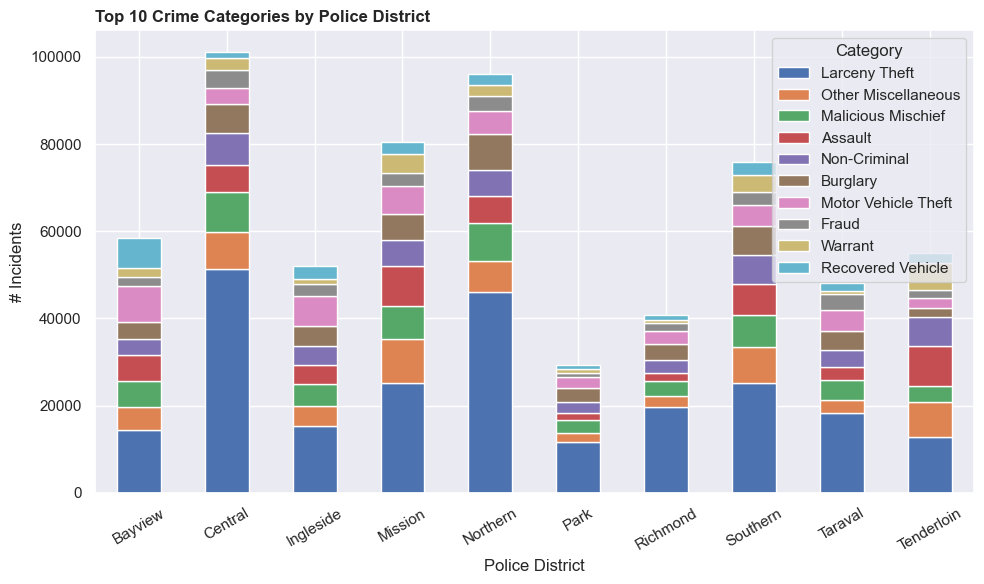

In [43]:
# Get the top N categories by incidents counts
top_n = 10

# Plot stacked bar chart
cat_pd_pivot = data.pivot_table(columns='category', index='police_district', aggfunc='size', fill_value=0)

ax = cat_pd_pivot[top_cats.iloc[0:top_n].index].plot(kind='bar', stacked=True, figsize=(Config.PAGE_WIDTH+2, 6))

# Move the legend
plt.legend(title='Category')#, bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.title(f'Top {top_n} Crime Categories by Police District', loc="left", fontdict={"weight": "bold"}, y=1.0)
plt.ylabel('# Incidents')
plt.xlabel('Police District')
plt.xticks(rotation=30)  # Keep the x-axis labels straight

# Show the plot
plt.tight_layout()
plt.savefig(Config.IMAGE_DIR / 'incidents_by_pd.png')
plt.show()

### Top Categories by Police District by Year

In [107]:
# Get the top N categories by incidents counts we used earlier
top_n = 5
p_cats = top_cats.iloc[0:top_n].index
p_data = data.query('category in @p_cats')
print(f'#Samples={p_data.shape[0]:,d}')

#Samples=462,461


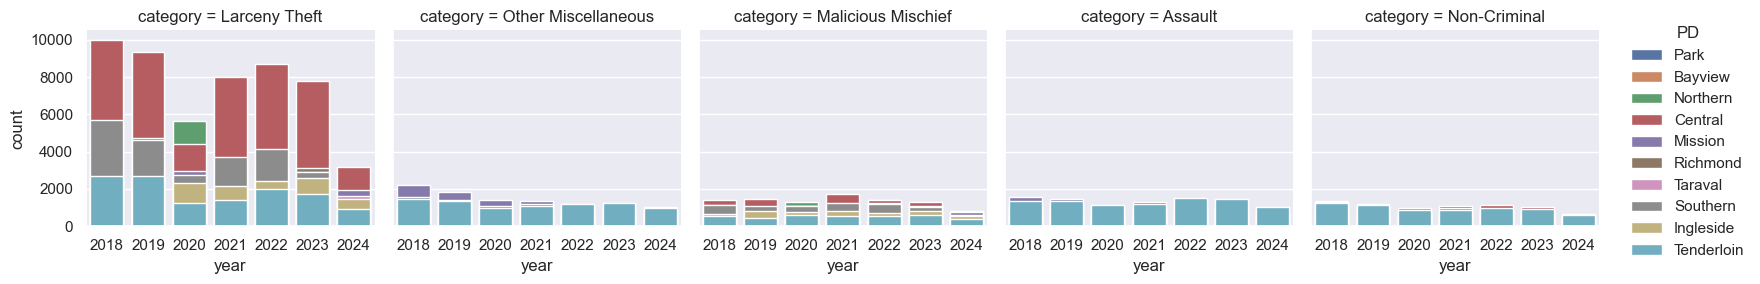

In [109]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# 5 columns per row
g = sns.FacetGrid(p_data, col='category', col_order=p_cats, hue='police_district', col_wrap=5)#, height=6)
g.map(sns.countplot, 'year', order=sorted(p_data.year.unique()))

# Adjust legend placement
g.add_legend(title="PD", bbox_to_anchor=(1, 0.5), loc='center left')

# Display the plot
plt.tight_layout()
g.savefig(Config.IMAGE_DIR / 'incidents_by_pd_year.png')
plt.show()

### Top Police District by Categories by Year

In [111]:
# Get the top N PDs by incidents counts
top_d = 10
top_c = 10
p_pds = top_pds.iloc[0:top_d].index
p_cats = top_cats.iloc[0:top_c].index
p_data = data.query('police_district in @p_pds and category in @p_cats')
print(f'#Samples={p_data.shape[0]:,d}')

#Samples=636,950


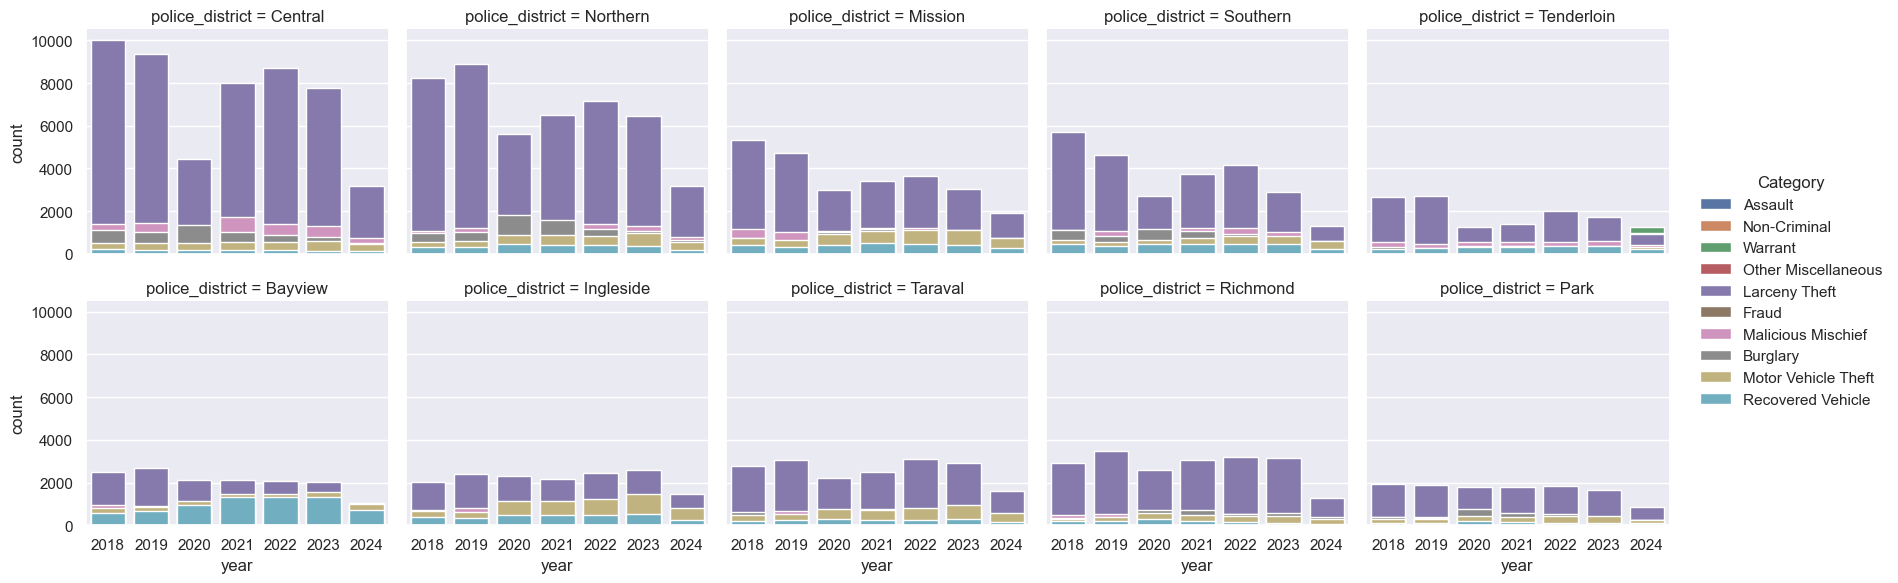

In [112]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# top_n columns per row
g = sns.FacetGrid(p_data, col='police_district', col_order=p_pds, hue='category', col_wrap=5)#, height=6)
g.map(sns.countplot, 'year', order=sorted(p_data.year.unique()))

# Adjust legend placement
g.add_legend(title="Category", bbox_to_anchor=(1, 0.5), loc='center left')

# Display the plot
plt.tight_layout()
g.savefig(Config.IMAGE_DIR / 'incidents_by_pd_by_category_year.png')
plt.show()

### Incident Resolution by Police District by Year

In [114]:
# Get the top N PDs by incidents counts
top_d = 10
top_c = 10
p_pds = top_pds.iloc[0:top_d].index
p_cats = top_cats.iloc[0:top_c].index
p_data = data.query('police_district in @p_pds')
print(f'#Samples={p_data.shape[0]:,d}')

#Samples=829,328


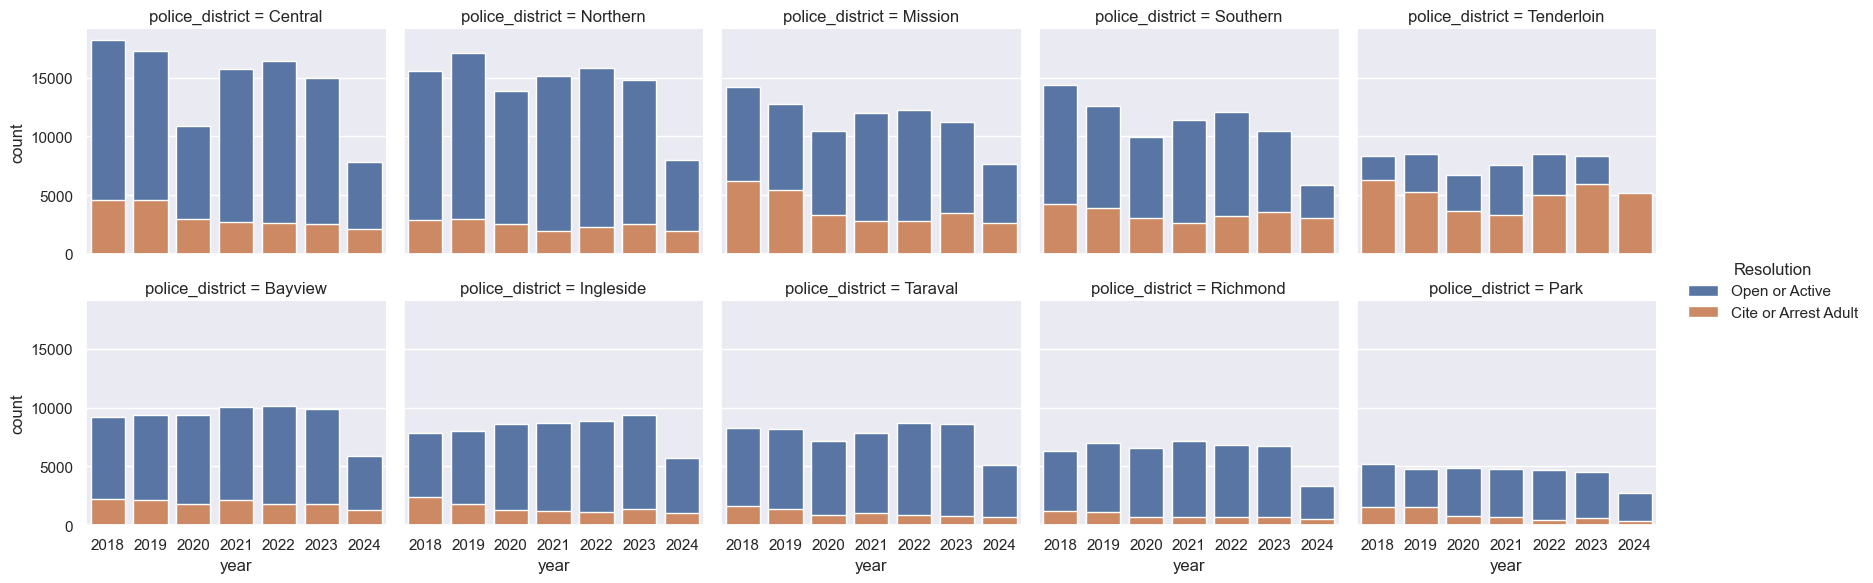

In [115]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# top_n columns per row
g = sns.FacetGrid(p_data, col='police_district', col_order=p_pds, hue='resolution', col_wrap=5)#, height=6)
g.map(sns.countplot, 'year', order=sorted(p_data.year.unique()))

# Adjust legend placement
g.add_legend(title="Resolution", bbox_to_anchor=(1, 0.5), loc='center left')

# Display the plot
plt.tight_layout()
g.savefig(Config.IMAGE_DIR / 'incidents_resolutions_by_pd_by_year.png')
plt.show()

In [116]:
logging.getLogger('matplotlib').setLevel(logging.INFO)